## EDA

Find a problem and best available solution for a similar request (real estate properties price prediction in any country/region) on Kaggle. Perform the model training and then execute it on a validation dataset. Provide the output of all stages and final result.



---



The chosen dataset: Melbourne Housing Market

Link: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

Dataset Description:

The dataset contains historical data, which allows for analysis and exploration of trends and patterns in the Melbourne housing market over time. It includes information on property sales, including the sale price, the type of property (e.g., house, unit), and the date of sale. There are also additional features that provide context, such as the suburb, council area, and region name.

Library import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/YU-DATASETS/master/Melbourne_housing_FULL.csv')

In [ ]:
df2=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/YU-DATASETS/master/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [ ]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Our data set provides the next use cases:


*   Suburb - name of the suburb where the residential property is located, type - categorical, nominal, string type.
*   Address - name of the address where the residential property is located, type -  categorical, nominal, string type.
*   Rooms - represents the number of rooms, numerical integer (discrete) type.
* Type -  provides information about the type of residential property. It indicates the broad category or classification of the property, distinguishing between different types of dwellings.

The values in the "Type" column typically represent three main categories:

"h" or "hous": This indicates a standalone house, which is a separate residential dwelling that is not attached to any other properties. It refers to a single-family home.

"u" or "unit": This represents a unit or apartment, which is a self-contained living space within a larger building or complex. Units are typically smaller in size and may be part of a multi-unit building.

"t" or "twnhs": This signifies a townhouse, which is a narrow, multi-level residence attached to other similar units. Townhouses are usually part of a row or cluster of connected dwellings.





*   Price  - presents the price or cost of residential properties, continious numerical type. (**TARGET VARIABLE**)
*   Method - The Method column indicates the method used for selling the property, such as S (property sold), SP (property sold prior), PI (property passed in), VB (vendor bid), SA (property sold after auction), or PN (sold prior not disclosed). It is a categorical, nominal variable represented as a string type.

* SellerG - The SellerG column represents the name of the real estate agent or agency that sold the property. It is a categorical, nominal variable represented as a string type.

* Date - The Date column indicates the date on which the property was sold. It typically includes the day, month, and year and is represented as a date or timestamp type.

* Distance - The Distance column represents the distance between the property and the central business district (CBD) of Melbourne. It is a numerical, continuous variable, typically measured in kilometers.

* Postcode - The Postcode column contains the postal code or zip code of the suburb where the property is located. It is a numerical, discrete variable represented as an integer type.

* Bedroom2 - The Bedroom2 column represents the number of bedrooms in the property, apart from the main bedroom (Bedroom1). It is a numerical, discrete variable represented as an integer type.

* Bathroom - The Bathroom column indicates the number of bathrooms in the property. It is a numerical, discrete variable represented as an integer type.

* Car - The Car column represents the number of car spaces or parking spots available with the property. It is a numerical, discrete variable represented as an integer type.

* Landsize - The Landsize column denotes the land area associated with the property, typically measured in square meters. It is a numerical, continuous variable.

* BuildingArea - The BuildingArea column indicates the total floor area of the building or dwelling on the property. It is a numerical, continuous variable.

* YearBuilt - The YearBuilt column represents the year in which the property was constructed or built. It is a numerical, discrete variable represented as an integer type.

* CouncilArea - The CouncilArea column contains the name of the local government area governing the suburb where the property is located. It is a categorical, nominal variable represented as a string type.

* Lattitude - The Lattitude column provides the latitude coordinates of the property's location. It is a numerical, continuous variable.

* Longtitude - The Longtitude column provides the longitude coordinates of the property's location. It is a numerical, continuous variable.

* Regionname - The Regionname column indicates the general region or area in Melbourne where the property is located. It is a categorical, nominal variable represented as a string type.

* Propertycount - The Propertycount column represents the total number of properties within the suburb. It is a numerical, discrete variable represented as an integer type.

These columns contain various attributes and information about the properties in the Melbourne Housing Market dataset, which can be used for analysis, exploration, and modeling tasks related to the real estate market.





---

As the fist we want delete columns that might not have a significant effect on the target varible on the price.

We have some knowledge and the factors that typically influence property prices.

In [ ]:
df2=df.copy()

Column 'Address' has no impact on the price. In real estate , the addreass is primarly used of address used for identification and reference purposes rather than as a direct determinant of property prices.

In [ ]:
del df2['Address']
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Column 'Postcode' has no impact on the price. In real estate , the 'Postocde' is primarly used of address used for identification and reference purposes rather than as a direct determinant of property prices.

In [ ]:
del df2['Postcode']
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/09/2016,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/02/2016,2.5,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Also other columns like SellerG,Date, Lattitude,Longtitude are used for identification and reference purposes rather than as a direct determinant of property prices.

In [ ]:
df2=df2.drop(['SellerG', 'Date', 'Lattitude', 'Longtitude'], axis=1 )
df2.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,2.5,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0




---

As the next step we are going to make EDA (Exploratory Data Analysis) of our dataset.

Suburb attribute

In [ ]:
df2['Suburb'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 34857 entries, 0 to 34856
Series name: Suburb
Non-Null Count  Dtype 
--------------  ----- 
34857 non-null  object
dtypes: object(1)
memory usage: 272.4+ KB


In [ ]:
df2['Suburb'].describe()

count         34857
unique          351
top       Reservoir
freq            844
Name: Suburb, dtype: object

In [ ]:
value_counts = df2['Suburb'].value_counts()

In [ ]:
top_values=value_counts.head().index

In [ ]:
df2_top_values=df2[df2['Suburb'].isin(top_values)]

<Axes: xlabel='Suburb', ylabel='count'>

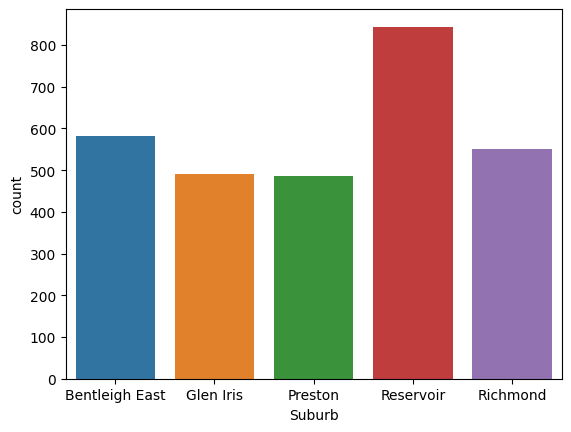

In [ ]:
sns.countplot(data=df2_top_values,x='Suburb')

Above the top suburbs by count in our dataset.



---
Rooms attribute


In [ ]:
df2['Rooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 34857 entries, 0 to 34856
Series name: Rooms
Non-Null Count  Dtype
--------------  -----
34857 non-null  int64
dtypes: int64(1)
memory usage: 272.4 KB


In [ ]:
df2['Rooms'].describe()

count    34857.000000
mean         3.031012
std          0.969933
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

<Axes: xlabel='Rooms', ylabel='count'>

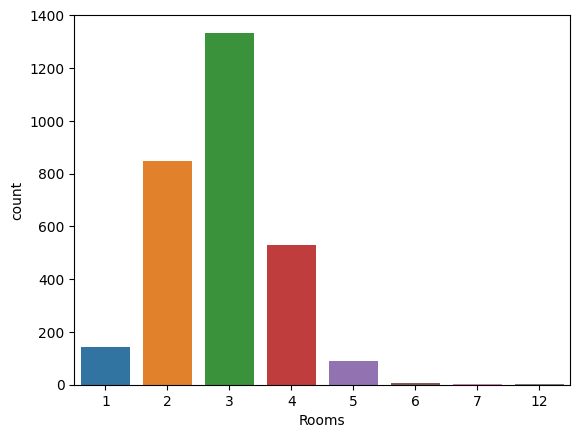

In [ ]:
sns.countplot(data=df2_top_values,x='Rooms')

As we can see the most common number of rooms in houses is 3.



---



Attribute Type

In [ ]:
df2['Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 34857 entries, 0 to 34856
Series name: Type
Non-Null Count  Dtype 
--------------  ----- 
34857 non-null  object
dtypes: object(1)
memory usage: 272.4+ KB


In [ ]:
df2['Type'].describe()

count     34857
unique        3
top           h
freq      23980
Name: Type, dtype: object

<Axes: xlabel='Type', ylabel='count'>

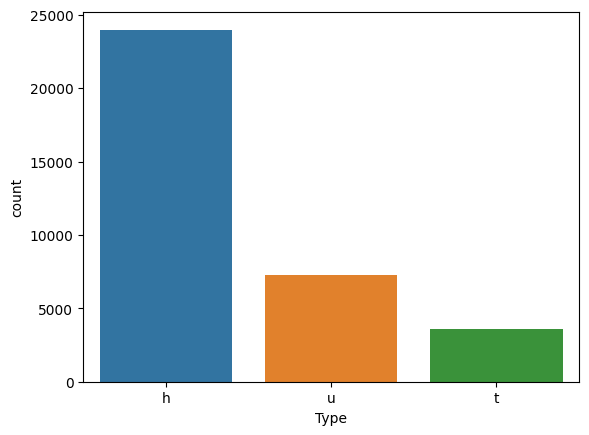

In [ ]:
sns.countplot(data=df2,x='Type')

The most common type is 'h' type.



---

Attribute 'Price' - target variable

In [ ]:
df2['Price']=pd.to_numeric(df2['Price'])

In [ ]:
df2['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 34857 entries, 0 to 34856
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
27247 non-null  float64
dtypes: float64(1)
memory usage: 272.4 KB


As we can engouh none values in the target variable.
When building predictive models or conducting statistical analyses, having complete and consistent data is crucial. Missing values in the target variable can lead to biased or inaccurate results if not properly addressed. We should delete them

In [ ]:
print(f'Current lenght of dataframe {len(df2)}')

Current lenght of dataframe 34857


In [ ]:
df2.dropna(subset='Price',inplace=True)

In [ ]:
print(f'Current lenght after drop rows by none target value {len(df2)}')

Current lenght after drop rows by none target value 27247


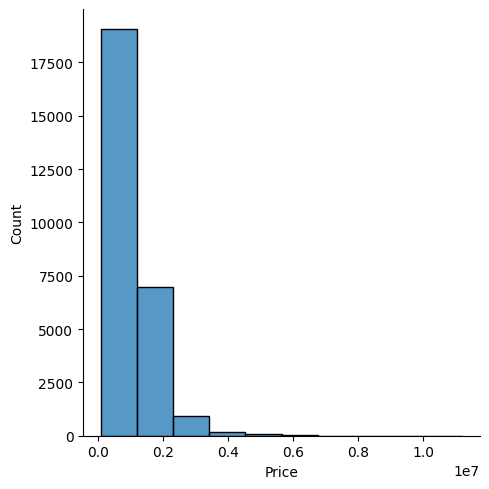

In [ ]:
sns.displot(data=df2, x='Price', kind='hist', bins=10)  # Adjust the 'column_name' and 'bins' parameters as per your data


Above we can view distribution houses by price

<Axes: xlabel='Price'>

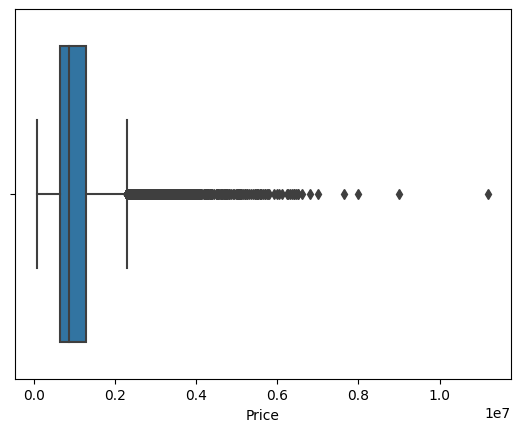

In [ ]:
sns.boxplot(data=df2, x='Price')  # Adjust the 'column_name' parameter as per your data


As we can see we have quite big amount of outliers we should delete to get better outcome from our model

In [ ]:
# Assuming your DataFrame is named 'df' and the column containing the data is named 'column_name'
column_name = 'Price'

# Calculate the z-scores for the column
z_scores = np.abs((df2[column_name] - df2[column_name].mean()) / df2[column_name].std())

# Define a threshold (e.g., z-score of 3) to identify outliers
threshold = 2

# Create a boolean mask indicating the outliers
outliers_mask = z_scores > threshold

# Remove the rows with outliers from the DataFrame
df2 = df2[~outliers_mask]

As we can see after applying the previos approach we  have less outliers

<Axes: xlabel='Price'>

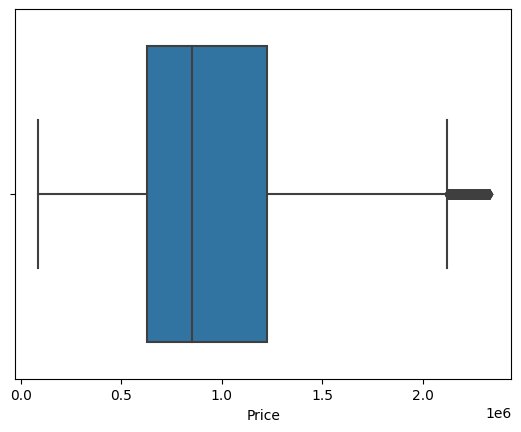

In [ ]:
sns.boxplot(data=df2, x='Price')  # Adjust the 'column_name' parameter as per your data


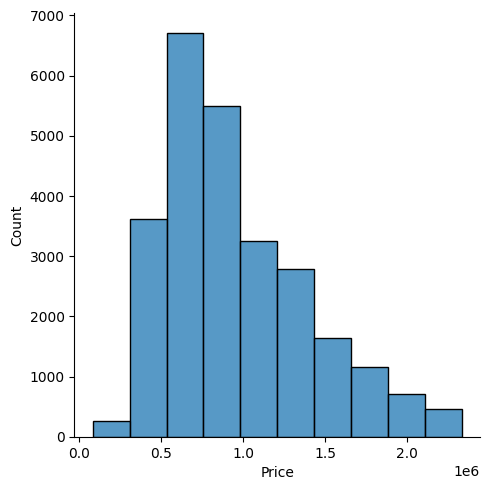

In [ ]:
sns.displot(data=df2, x='Price', kind='hist', bins=10)  # Adjust the 'column_name' and 'bins' parameters as per your data


After operation our distribution plot looks more like normal disrtribution.

In [ ]:
print(f'Ather this opeation length of our dataset is {len(df2)}')

Ather this opeation length of our dataset is 26069




---

Attribute Method

In [ ]:
df2['Method'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Method
Non-Null Count  Dtype 
--------------  ----- 
26069 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [ ]:
df2['Method'].describe()

count     26069
unique        5
top           S
freq      16830
Name: Method, dtype: object

<Axes: xlabel='Method', ylabel='count'>

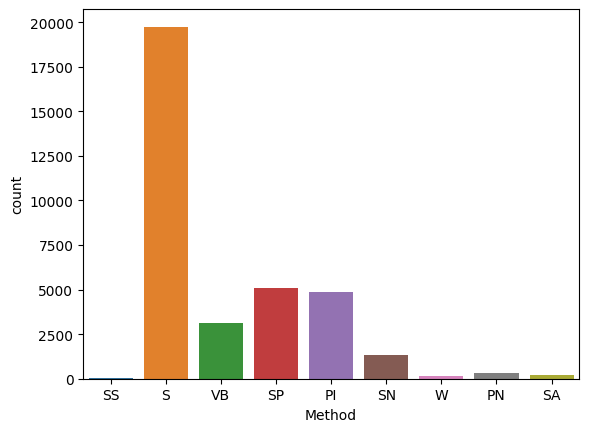

In [ ]:
sns.countplot(data=df,x='Method')

As we can see our the most common method is 'S'.



---
Attribute 'Distance'


In [ ]:
df2['Distance'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Distance
Non-Null Count  Dtype  
--------------  -----  
26068 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [ ]:
df2['Distance'].describe()

count    26068.000000
mean        11.433731
std          6.862060
min          0.000000
25%          6.500000
50%         10.500000
75%         14.200000
max         48.100000
Name: Distance, dtype: float64

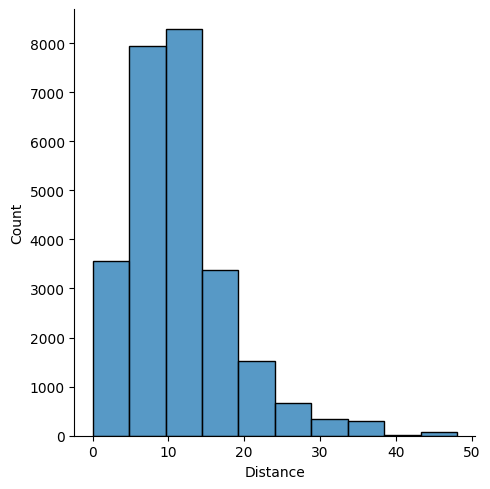

In [ ]:
sns.displot(data=df2, x='Distance', kind='hist', bins=10)  # Adjust the 'column_name' and 'bins' parameters as per your data


<Axes: xlabel='Distance'>

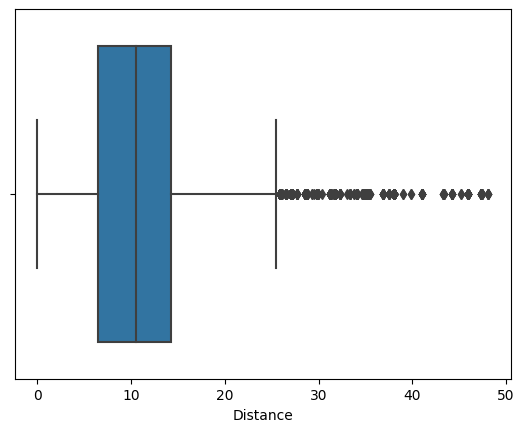

In [ ]:
sns.boxplot(data=df2, x='Distance')  # Adjust the 'column_name' parameter as per your data

We have some outliers,  but we will keep it, because it can bring some insights to our model.



---

Attribute 'Bathroom2'



In [ ]:
df2['Bedroom2'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Bedroom2
Non-Null Count  Dtype  
--------------  -----  
19805 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


Here we have a lot of none values , we will replace it by zero.

In [ ]:
df2['Bedroom2']=df2['Bedroom2'].fillna(0)

In [ ]:
df2['Bedroom2'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Bedroom2
Non-Null Count  Dtype  
--------------  -----  
26069 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


<Axes: xlabel='Bedroom2', ylabel='count'>

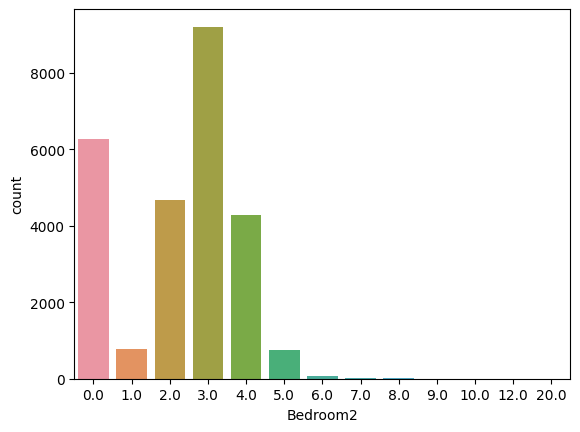

In [ ]:
sns.countplot(data=df2,x='Bedroom2')

The most common of 'Bedroom2' is 3.



---

Attrubute 'Bathroom'


In [ ]:
df2['Bathroom'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Bathroom
Non-Null Count  Dtype  
--------------  -----  
19801 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


Here we have a lot of none values , we will replace it by most common value.

In [ ]:
df2['Bathroom']=df2['Bathroom'].fillna(df2['Bathroom'].mode().iloc[0])

In [ ]:
df2['Bathroom'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Bathroom
Non-Null Count  Dtype  
--------------  -----  
26069 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


<Axes: xlabel='Bathroom', ylabel='count'>

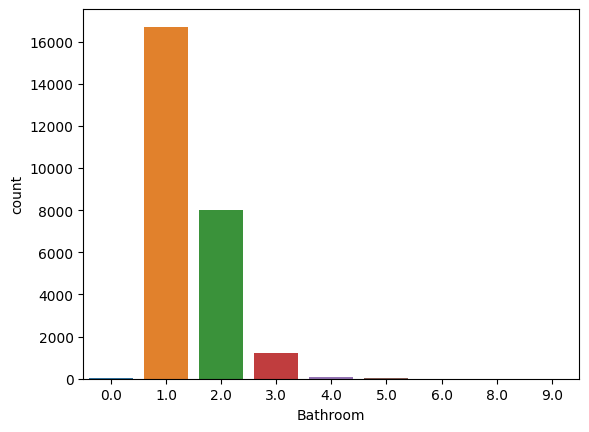

In [ ]:
sns.countplot(data=df2,x='Bathroom')

The most common amout of bathrooms is 1.



---

Attribute 'Car'

In [ ]:
df2['Car'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Car
Non-Null Count  Dtype  
--------------  -----  
19432 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


Here we have a lot of none values , we will replace it by most common value.

In [ ]:
df2['Car']=df2['Car'].fillna(df2['Car'].mode().iloc[0])

In [ ]:
df2['Car'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Car
Non-Null Count  Dtype  
--------------  -----  
26069 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


<Axes: xlabel='Car', ylabel='count'>

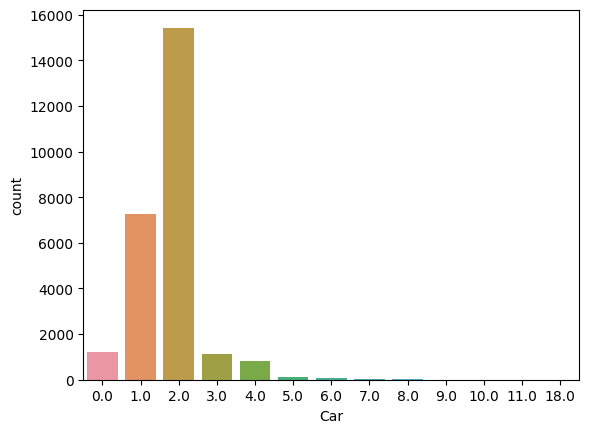

In [ ]:
sns.countplot(data=df2,x='Car')

The most common amount of attribute 'Car' is 2



---

Attribute  'Landsize'

We will replace none values by mean value

In [ ]:
df2['Landsize']=df2['Landsize'].fillna(df2['Landsize'].mean())

In [ ]:
df2['Landsize'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Landsize
Non-Null Count  Dtype  
--------------  -----  
17103 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


The biggest part of values of this attribute is none then we will delete this attribute

In [ ]:
del df2['Landsize']



---

Attribute 'BuildingArea'



In [ ]:
df2['BuildingArea'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: BuildingArea
Non-Null Count  Dtype  
--------------  -----  
10094 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


The biggest part of values of this attribute is none then  we will delete this attribute.

In [ ]:
del df2['BuildingArea']

In [ ]:
df2.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0


The same situation we have with YearBuilt' attribute feature.

In [ ]:
df2['YearBuilt'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: YearBuilt
Non-Null Count  Dtype  
--------------  -----  
11459 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [ ]:
del df2['YearBuilt']



---

Attribute  CouncilArea

In [ ]:
df2['CouncilArea'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: CouncilArea
Non-Null Count  Dtype 
--------------  ----- 
26066 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [ ]:
df2['CouncilArea'].dropna(inplace=True)

In [ ]:
df2['CouncilArea'].describe()

count                    26066
unique                      33
top       Darebin City Council
freq                      2332
Name: CouncilArea, dtype: object

In [ ]:
value_counts = df2['CouncilArea'].value_counts().head().index

In [ ]:
df2_top_values=df2[df2['CouncilArea'].isin(value_counts)]

<Axes: xlabel='CouncilArea', ylabel='count'>

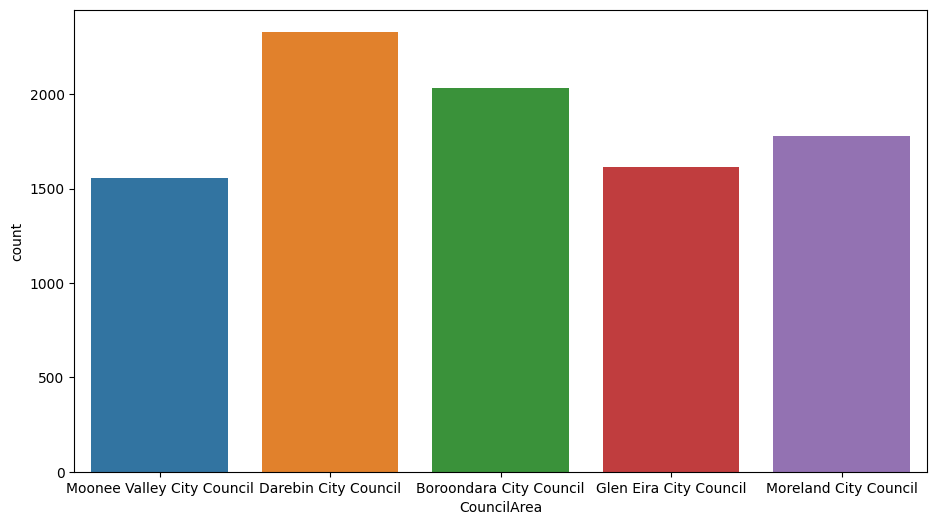

In [ ]:
plt.figure(figsize=(11, 6))  # Set the size of the figure (width, height)

sns.countplot(data=df2_top_values,x='CouncilArea')

As we can see the most common Council area is Darebin.



---

Attribute 'Region Name'

In [ ]:
df2['Regionname'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Regionname
Non-Null Count  Dtype 
--------------  ----- 
26066 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [ ]:
df2['Regionname'].describe()

count                     26066
unique                        8
top       Northern Metropolitan
freq                       7778
Name: Regionname, dtype: object

In [ ]:
value_counts = df2['Regionname'].value_counts().head().index

In [ ]:
df2_top_values=df2[df2['Regionname'].isin(value_counts)]

<Axes: xlabel='Regionname', ylabel='count'>

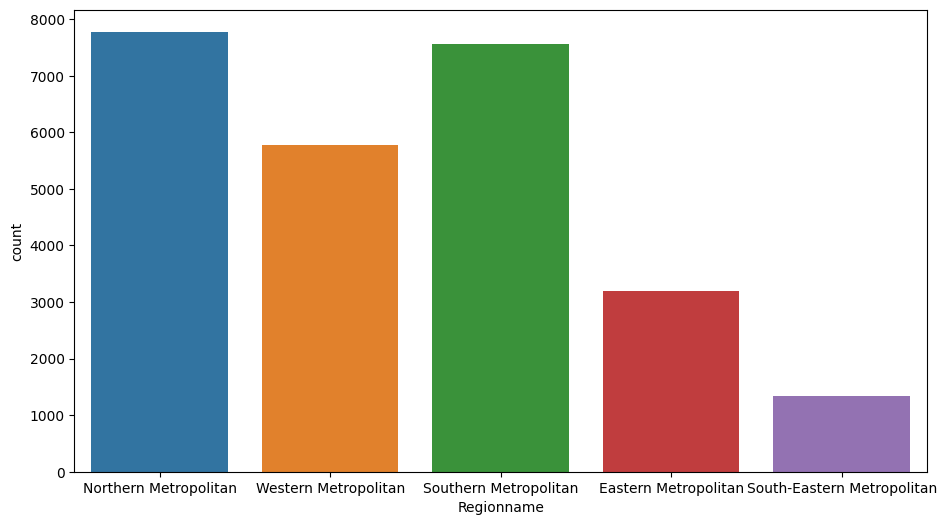

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(data=df2_top_values,x='Regionname')

As we can see the most common value is 'North Metropolitan'

In [ ]:
df2

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,6.3,0.0,1.0,2.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0




---

Attribute 'Propertycount'

In [ ]:
df2['Propertycount'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26069 entries, 1 to 34856
Series name: Propertycount
Non-Null Count  Dtype  
--------------  -----  
26066 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [ ]:
df2['Propertycount'].describe()

count    26066.000000
mean      7575.170183
std       4542.393097
min         83.000000
25%       4258.000000
50%       6567.000000
75%      10412.000000
max      21650.000000
Name: Propertycount, dtype: float64

In [ ]:
df2['Propertycount'].dropna(inplace=True)

<Axes: xlabel='Propertycount', ylabel='Count'>

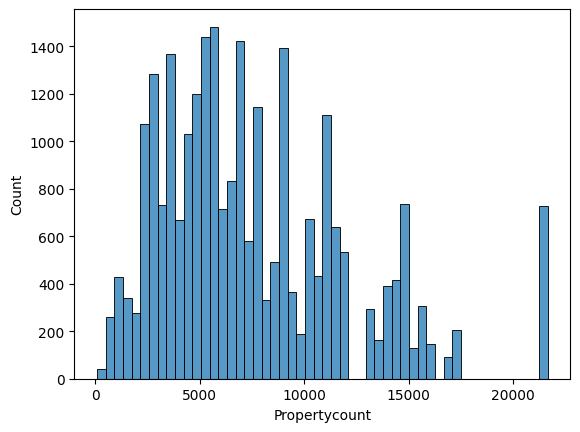

In [ ]:
sns.histplot(data=df2, x='Propertycount')

<Axes: xlabel='Propertycount'>

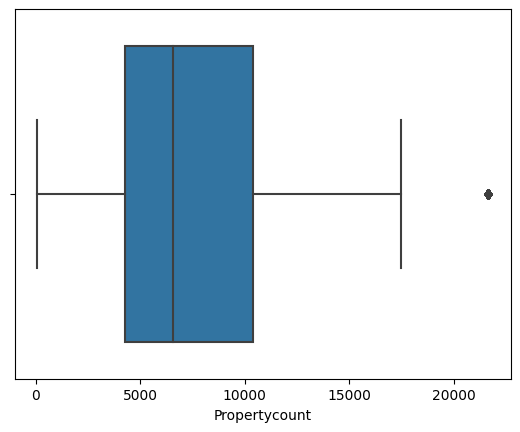

In [ ]:
sns.boxplot(data=df2, x='Propertycount')

As we can see the biggest quantity of values between 5000 and 10 000. And we have only obe outlier


---



## CHECK CORRELATION BETWEEN NUMERICAL VARIABLES AND TARGER VARIABLE

In [ ]:
df2.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0


In [ ]:
df3=df2[['Rooms','Price','Distance','Bedroom2','Car','Landsize','Propertycount']]

In [ ]:
df3.corr()['Price']

Rooms            0.450993
Price            1.000000
Distance        -0.202997
Bedroom2         0.300715
Car              0.123764
Landsize         0.025805
Propertycount   -0.081400
Name: Price, dtype: float64

As we can see the biggest impact on the target variable is attribute 'Rooms'.

## Check by Chi-squared statistic RELATIONSHEEP BETWEEN CATEGORICAL VARIABLES AND TARGET VARIABLE

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df3=df2.copy()



---

Attribute 'Suburb'

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df2['Suburb'], df2['Price'])
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [ ]:
chi2, p, dof, expected

(824265.1468576967,
 1.0,
 857936,
 array([[3.91269324e-03, 3.91269324e-03, 3.91269324e-03, ...,
         3.91269324e-03, 5.86903986e-02, 2.34761594e-02],
        [2.49338295e-03, 2.49338295e-03, 2.49338295e-03, ...,
         2.49338295e-03, 3.74007442e-02, 1.49602977e-02],
        [5.79232038e-03, 5.79232038e-03, 5.79232038e-03, ...,
         5.79232038e-03, 8.68848057e-02, 3.47539223e-02],
        ...,
        [9.55157467e-03, 9.55157467e-03, 9.55157467e-03, ...,
         9.55157467e-03, 1.43273620e-01, 5.73094480e-02],
        [3.83597376e-05, 3.83597376e-05, 3.83597376e-05, ...,
         3.83597376e-05, 5.75396064e-04, 2.30158426e-04],
        [3.83597376e-05, 3.83597376e-05, 3.83597376e-05, ...,
         3.83597376e-05, 5.75396064e-04, 2.30158426e-04]]))

The p-value represents the probability of observing a chi-squared statistic as extreme as the one calculated, assuming the null hypothesis is true (i.e., the variables are independent).

In this case, the p-value is 1.0, which indicates that there is no evidence to reject the null hypothesis.



We will delete this column

In [ ]:
del df3['Suburb']



---

Attribute 'Type'

In [ ]:
contingency_table = pd.crosstab(df2['Type'], df2['Price'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f'P is {p}')

P is 0.0


P-value is zero (p = 0), it indicates that the observed data is extremely unlikely to occur by chance alone under the assumption of independence between the variables.

As the next stage we will convert this numerical representation





In [ ]:
lb=LabelEncoder()

In [ ]:
df3['Type']=lb.fit_transform(df2['Type'])

In [ ]:
df3

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
1,2,0,1480000.0,S,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,2,0,1035000.0,S,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
4,3,0,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
5,3,0,850000.0,PI,2.5,3.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0
6,4,0,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,0,1480000.0,PI,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,2,0,888000.0,SP,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,2,1,705000.0,S,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,3,0,1140000.0,SP,6.3,0.0,1.0,2.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0




---

Attribute 'Method'

In [ ]:
contingency_table = pd.crosstab(df2['Method'], df2['Price'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f'P is {p}')

P is 4.458650078280601e-46


With such a small p-value, it is highly unlikely that the observed data occurred by chance alone under the assumption of independence between the variables

In [ ]:
lb=LabelEncoder()
df3['Method']=lb.fit_transform(df2['Method'])

In [ ]:
df3

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
1,2,0,1480000.0,1,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,2,0,1035000.0,1,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
4,3,0,1465000.0,3,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
5,3,0,850000.0,0,2.5,3.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0
6,4,0,1600000.0,4,2.5,3.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,0,1480000.0,0,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,2,0,888000.0,3,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,2,1,705000.0,1,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,3,0,1140000.0,3,6.3,0.0,1.0,2.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0




---

Attribute 'CouncilArea'

In [ ]:
contingency_table = pd.crosstab(df2['CouncilArea'], df2['Price'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f'P is {p}')

P is 8.908317105803284e-129


A p-value of 8.908317105803284e-129 is an extremely small value, indicating an exceptionally strong level of evidence against the null hypothesis. In scientific notation, this value can be expressed as approximately 8.91 × 10^(-129).

With such a tiny p-value, it is highly unlikely that the observed data occurred by chance alone under the assumption of independence between the variables. This strongly suggests a significant association or relationship between the variables 'CouncilArea' and 'Price'.

In [ ]:
lb=LabelEncoder()
df3['CouncilArea']=lb.fit_transform(df2['CouncilArea'])

In [ ]:
df3

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
1,2,0,1480000.0,1,2.5,2.0,1.0,1.0,202.0,31,Northern Metropolitan,4019.0
2,2,0,1035000.0,1,2.5,2.0,1.0,0.0,156.0,31,Northern Metropolitan,4019.0
4,3,0,1465000.0,3,2.5,3.0,2.0,0.0,134.0,31,Northern Metropolitan,4019.0
5,3,0,850000.0,0,2.5,3.0,2.0,1.0,94.0,31,Northern Metropolitan,4019.0
6,4,0,1600000.0,4,2.5,3.0,1.0,2.0,120.0,31,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,0,1480000.0,0,6.3,4.0,1.0,3.0,593.0,16,Western Metropolitan,6543.0
34853,2,0,888000.0,3,6.3,2.0,2.0,1.0,98.0,16,Western Metropolitan,6543.0
34854,2,1,705000.0,1,6.3,2.0,1.0,2.0,220.0,16,Western Metropolitan,6543.0
34855,3,0,1140000.0,3,6.3,0.0,1.0,2.0,NaN,16,Western Metropolitan,6543.0




---
Attribute 'Regionname'


In [ ]:
contingency_table = pd.crosstab(df2['Regionname'], df2['Price'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f'P is {p}')

P is 9.899854487816166e-171


With such a small p-value, it is highly unlikely that the observed data occurred by chance alone under the assumption of independence between the variables

In [ ]:
lb=LabelEncoder()
df3['Regionname']=lb.fit_transform(df2['Regionname'])

In [ ]:
df3

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
1,2,0,1480000.0,1,2.5,2.0,1.0,1.0,202.0,31,2,4019.0
2,2,0,1035000.0,1,2.5,2.0,1.0,0.0,156.0,31,2,4019.0
4,3,0,1465000.0,3,2.5,3.0,2.0,0.0,134.0,31,2,4019.0
5,3,0,850000.0,0,2.5,3.0,2.0,1.0,94.0,31,2,4019.0
6,4,0,1600000.0,4,2.5,3.0,1.0,2.0,120.0,31,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,0,1480000.0,0,6.3,4.0,1.0,3.0,593.0,16,6,6543.0
34853,2,0,888000.0,3,6.3,2.0,2.0,1.0,98.0,16,6,6543.0
34854,2,1,705000.0,1,6.3,2.0,1.0,2.0,220.0,16,6,6543.0
34855,3,0,1140000.0,3,6.3,0.0,1.0,2.0,NaN,16,6,6543.0


## BUILD PREDICTIVE MODEL

We will compare two models: LinearRegression, and RandomForestRegressor

As the first step we are going to split our data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def R_squared(y_test, y_pred, X_train):
    # Calculate the R-squared value
    r2 = r2_score(y_test, y_pred)

    # Calculate the number of predictors in the model
    num_predictors = X_train.shape[1]

    # Calculate the number of observations in the testing data
    num_observations = len(y_test)

    # Calculate the adjusted R-squared value
    adjusted_r2 = 1 - (1 - r2) * (num_observations - 1) / (num_observations - num_predictors - 1)

    return adjusted_r2

In [ ]:
df3=df3.dropna()

In [ ]:
y=df3['Price']

In [ ]:
X=df3.drop('Price',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


As the next step we fit our model - Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 ADJUSTED',R_squared(y_test, y_pred, X_train))

MAE: 262574.10649821395
MSE: 113205221681.28777
RMSE: 336459.8366540764
R2 ADJUSTED 0.4410743728885439


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred2=rf.predict(X_test)

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred2)))
print('R2 ADJUSTED',R_squared(y_test, y_pred2, X_train))

MAE: 140172.47302159944
MSE: 39661832078.600075
RMSE: 199152.78576660703
R2 ADJUSTED 0.804178517230137


Support Vector Regression (SVR)

In [ ]:
svr = SVR(kernel='rbf')

# Train the SVR model
svr.fit(X_train, y_train)

y_pred3 = svr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred3))
print('MSE:', mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred3)))
print('R2 ADJUSTED',R_squared(y_test, y_pred3, X_train))

MAE: 354714.2419675883
MSE: 214484223700.8078
RMSE: 463124.4149262785
R2 ADJUSTED -0.058968194726864764


The best R2 adjusted value of **RandomForestRegressor is 0.8** is generally considered quite good on validation data. The R2 adjusted (or adjusted R-squared) is a modified version of the R-squared that adjusts for the number of predictors in the model. It provides a measure of the proportion of the variance in the dependent variable that is explained by the independent variables.

The R2 adjusted value ranges from 0 to 1, where a value of 1 indicates that the independent variables explain all of the variation in the dependent variable, and a value of 0 indicates that the independent variables have no explanatory power.

As we can see RandomForestRegressor brings better results than other models.